In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:25<00:00, 38.3MB/s]
100% 812M/812M [00:25<00:00, 33.4MB/s]


In [6]:
ls

dogs-vs-cats.zip  kaggle.json  sample_data/


In [7]:
from zipfile import ZipFile

df = '/content/dogs-vs-cats.zip'
with ZipFile(df, 'r') as zip:
  zip.extractall()
  print('Dateset is Extracted')

Dateset is Extracted


In [8]:
from zipfile import ZipFile

df = '/content/train.zip'
with ZipFile(df, 'r') as zip:
  zip.extractall()
  print('Dateset is Extracted')

Dateset is Extracted


In [9]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print(file_count)


25000


In [10]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.3850.jpg', 'dog.8971.jpg', 'cat.966.jpg', 'dog.8597.jpg', 'cat.1525.jpg', 'dog.10424.jpg', 'dog.223.jpg', 'dog.4918.jpg', 'cat.6564.jpg', 'cat.4140.jpg', 'cat.4304.jpg', 'cat.6504.jpg', 'dog.1624.jpg', 'cat.2766.jpg', 'cat.612.jpg', 'dog.11435.jpg', 'cat.7518.jpg', 'dog.6607.jpg', 'dog.2405.jpg', 'cat.12037.jpg', 'dog.1945.jpg', 'cat.9922.jpg', 'dog.7021.jpg', 'dog.5353.jpg', 'dog.11406.jpg', 'dog.801.jpg', 'dog.6968.jpg', 'cat.749.jpg', 'cat.3377.jpg', 'cat.5032.jpg', 'cat.2372.jpg', 'dog.861.jpg', 'dog.8979.jpg', 'cat.4997.jpg', 'cat.11164.jpg', 'cat.10480.jpg', 'cat.7286.jpg', 'cat.841.jpg', 'dog.5623.jpg', 'cat.6721.jpg', 'dog.11706.jpg', 'cat.11673.jpg', 'dog.6590.jpg', 'cat.5702.jpg', 'cat.426.jpg', 'cat.1055.jpg', 'dog.10917.jpg', 'dog.11464.jpg', 'dog.5100.jpg', 'dog.2431.jpg', 'dog.3978.jpg', 'dog.10650.jpg', 'cat.6972.jpg', 'dog.9212.jpg', 'cat.2654.jpg', 'cat.5597.jpg', 'dog.8066.jpg', 'cat.12433.jpg', 'dog.5950.jpg', 'dog.9525.jpg', 'dog.8252.jpg', 'cat.1496.jpg', 'ca

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

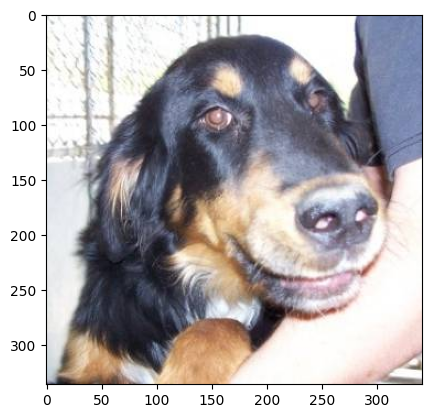

In [12]:
img = mpimg.imread('/content/train/dog.3850.jpg')
imgplot = plt.imshow(img)
plt.show()

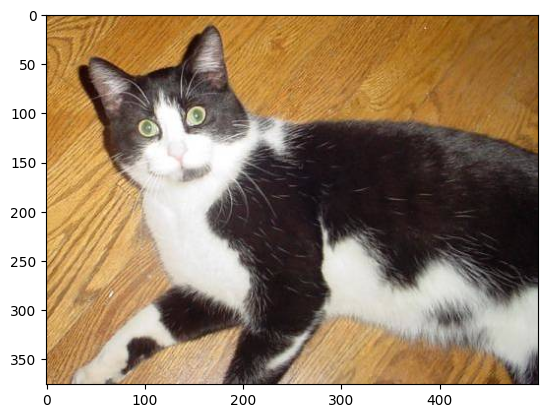

In [13]:
img = mpimg.imread('/content/train/cat.966.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
d, c = 0, 0

for i in range(len(file_names)):
  if file_names[i][0] == 'd':
    d+=1
  else:
    c+=1

print(d, c)

12500 12500


In [15]:
os.mkdir('/content/image_resized')

In [16]:
original_f = '/content/train/'
resized_f = '/content/image_resized/'

for i in range(2000):
  filename = os.listdir(original_f)[i]
  img_path = original_f+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_f+filename
  img.save(newImgPath)

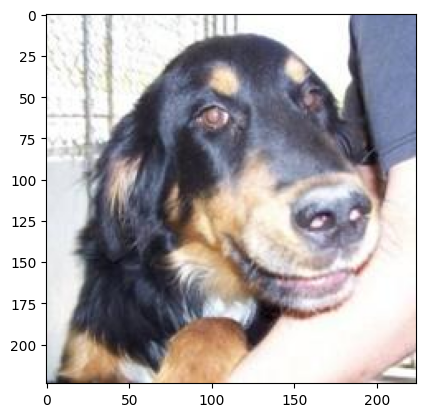

In [25]:
img = mpimg.imread('/content/image_resized/dog.3850.jpg')
imgplot = plt.imshow(img)
plt.show()

In [32]:
labels = []
filenames = os.listdir('/content/image_resized/')

for i in range(2000):
  file_name = filenames[i]
  label = file_name[:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

dog
dog
cat
dog
cat
dog
dog
dog
cat
cat
cat
cat
dog
cat
cat
dog
cat
dog
dog
cat
dog
cat
dog
dog
dog
dog
dog
cat
cat
cat
cat
dog
dog
cat
cat
cat
cat
cat
dog
cat
dog
cat
dog
cat
cat
cat
dog
dog
dog
dog
dog
dog
cat
dog
cat
cat
dog
cat
dog
dog
dog
cat
cat
dog
dog
cat
dog
dog
cat
dog
dog
dog
dog
dog
cat
dog
dog
cat
dog
cat
dog
dog
cat
cat
cat
dog
dog
dog
cat
dog
dog
cat
dog
dog
cat
dog
dog
dog
cat
dog
dog
dog
cat
dog
cat
cat
dog
cat
dog
cat
cat
cat
dog
dog
dog
cat
cat
dog
cat
dog
dog
dog
cat
cat
cat
cat
dog
cat
dog
dog
cat
cat
cat
cat
dog
cat
dog
cat
cat
cat
dog
cat
dog
dog
cat
cat
dog
cat
cat
dog
dog
dog
dog
cat
dog
dog
cat
dog
dog
cat
dog
cat
dog
dog
cat
dog
cat
dog
dog
cat
cat
dog
dog
cat
dog
dog
dog
dog
cat
cat
cat
cat
cat
cat
cat
dog
cat
dog
cat
dog
dog
dog
cat
dog
cat
cat
dog
dog
cat
dog
cat
cat
dog
dog
dog
cat
dog
cat
dog
cat
dog
dog
cat
cat
cat
cat
dog
dog
dog
dog
dog
cat
cat
cat
dog
cat
dog
dog
cat
cat
dog
cat
cat
dog
dog
dog
dog
dog
cat
dog
dog
cat
cat
dog
cat
dog
dog
dog
cat
cat


In [36]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 979 1021]


In [37]:
import cv2
import glob


In [41]:
image_dir = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [43]:
type(dog_cat_images)

numpy.ndarray

In [44]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [45]:
x = dog_cat_images
y = np.asarray(labels)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [48]:
x_train_scale = x_train/255
x_test_scale = x_test/255

In [49]:
print(x_train_scale)

[[[[0.25098039 0.21568627 0.20392157]
   [0.29803922 0.2627451  0.25098039]
   [0.24313725 0.20392157 0.20392157]
   ...
   [0.50980392 0.45098039 0.48235294]
   [0.49411765 0.43529412 0.46666667]
   [0.49019608 0.43137255 0.4627451 ]]

  [[0.25882353 0.22352941 0.21176471]
   [0.30196078 0.26666667 0.25490196]
   [0.25098039 0.21176471 0.21176471]
   ...
   [0.47058824 0.41176471 0.44313725]
   [0.44705882 0.38823529 0.41960784]
   [0.44313725 0.38431373 0.41568627]]

  [[0.25490196 0.21960784 0.20784314]
   [0.29019608 0.25490196 0.24313725]
   [0.25098039 0.21176471 0.21176471]
   ...
   [0.44705882 0.38823529 0.41960784]
   [0.41568627 0.35686275 0.38823529]
   [0.40784314 0.34901961 0.38039216]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.23529412 0.16862745 0.3372549 ]
   [0.23529412 0.16470588 0.3254902 ]
   [0.23529412 0.16470588 0.3254902 ]]

  [[1.         1.         1.        ]
   [1. 

In [50]:
import tensorflow as tf
import tensorflow_hub as hub

In [51]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [57]:
!pip install tf_keras
import tf_keras

In [58]:
num_of_classes = 2

model = tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [62]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [64]:
model.fit(x_train_scale, y_train, epochs=5)

Epoch 1/5
57/57 [==============================] - 74s 1s/step - loss: 0.1080 - accuracy: 0.9628
Epoch 2/5
57/57 [==============================] - 74s 1s/step - loss: 0.0698 - accuracy: 0.9767
Epoch 3/5
57/57 [==============================] - 74s 1s/step - loss: 0.0498 - accuracy: 0.9833
Epoch 4/5
57/57 [==============================] - 74s 1s/step - loss: 0.0401 - accuracy: 0.9878
Epoch 5/5
57/57 [==============================] - 74s 1s/step - loss: 0.0325 - accuracy: 0.9922


In [65]:
score_, accuracy_ = model.evaluate(x_test_scale, y_test)

7/7 [==============================] - 15s 2s/step - loss: 0.0670 - accuracy: 0.9750


Path of the image to be predicted/content/dog.jpg


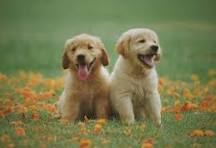

1/1 [==============================] - 0s 84ms/step
Dog


In [78]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/255

image_reshape = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshape)

input_predict_label = np.argmax(input_prediction)

if input_predict_label==1:
  print('Dog')
else:
  print("Cat")